In [35]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from scipy.ndimage import zoom
from scipy.optimize import minimize_scalar
from cued_sf2_lab.familiarisation import load_mat_img, plot_image

In [36]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lena, _ = load_mat_img(img='lena.mat', img_info='image')
peppers, _ = load_mat_img(img='peppers.mat', img_info='image')
columbia, _ = load_mat_img(img='columbia.mat', img_info='image')
camera, _ = load_mat_img(img='camera.mat', img_info='image')
lake, _ = load_mat_img(img='lake.mat', img_info='image')
baboon, _ = load_mat_img(img='baboon.mat', img_info='image')
couple, _ = load_mat_img(img='couple.mat', img_info='image')
plane, _ = load_mat_img(img='plane.mat', img_info='image')
peppers = zoom(peppers, 256/512)
columbia = zoom(columbia, 256/480)
lena = zoom(lena, 256/512)
baboon = zoom(baboon, 256/512)
plane = zoom(plane, 256/512)
lake = zoom(lake, 256/512)
couple = zoom(couple, 256/512)

In [37]:
lighthouse = lighthouse - 128.0
flamingo = flamingo - 128.0
bridge = bridge - 128.0
lena = lena - 128.0
peppers = peppers - 128.0
columbia = columbia - 128.0
camera = camera - 128.0
baboon = baboon - 128.0
plane = plane - 128.0
lake = lake - 128.0
couple = couple - 128.0

In [38]:
image = camera
target_bits = 40960

In [39]:
from skimage.metrics import structural_similarity as ssim_comp
import sewar

# Structural Similarity Index (SSIM)
def ssim_index(imageA, imageB):
    return ssim_comp(imageA, imageB, multichannel=True)

# Visual Information Fidelity
def vif_index(imageA, imageB):
    return sewar.full_ref.vifp(imageA, imageB)

In [40]:
from cued_sf2_lab.jpeg_dwt_param import jpegdec_dwt, jpegenc_dwt, objective_function_dwt

Performing 3-level DWT
Quantising to step size of 5.109806886891188
Regrouping into 8 x 8 blocks
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39530
Bits for huffman table = 1424
40954
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 5.109806886891188
Performing inverse DWT


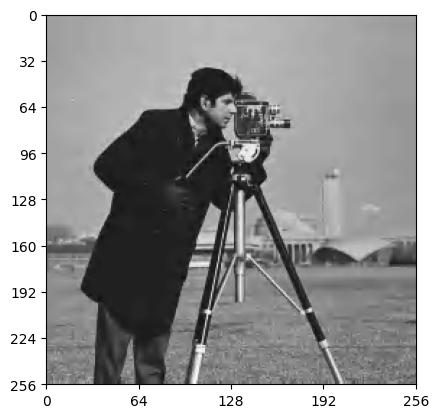

In [41]:
n = 3
M = 8 #2**n
rise = 1
step = (minimize_scalar(objective_function_dwt, bounds=(1, 20), args=(image, rise, target_bits, n, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_dwt(image, step, rise, n, M, opthuff=True)
print(totalbits)
Z = jpegdec_dwt(vlc, step, rise, n, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [42]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

7.056301007688322 0.867283907692299 0.48849266601404123


In [43]:
from cued_sf2_lab.jpeg_lbt_2 import jpegdec_lbt2, jpegenc_lbt2, objective_function_lbt2

Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Performing frequency dependent quantisation with overall step size of 8.469121162229353
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39521
Bits for huffman table = 1424
40945
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse FDQ to step size of 8.469121162229353
Inverting second 4 x 4 LBT
Inverse 4 x 4 LBT



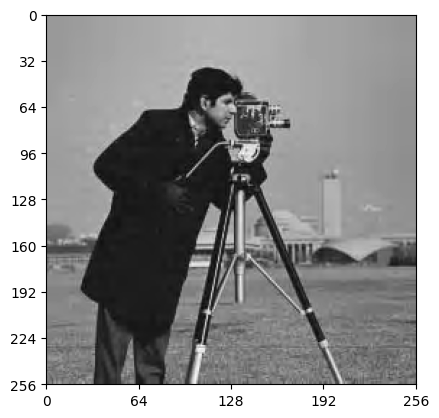

In [44]:
N = 4
M = 16
fdq = True

step = (minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [45]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

6.749636627757567 0.8815346670426422 0.5018577665995927


Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Quantising to step size of 29.30740304792598
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39537
Bits for huffman table = 1424
40961
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 29.30740304792598
Inverting second 4 x 4 LBT
Inverse 4 x 4 LBT



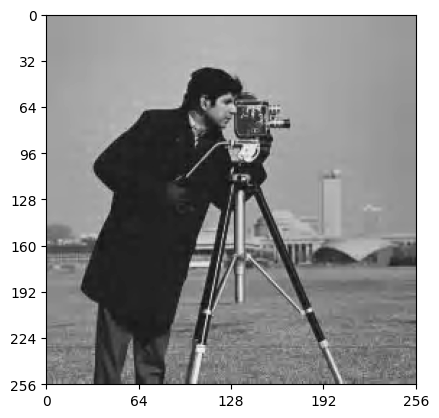

In [46]:
N = 4
M = 16
fdq = False

step = (minimize_scalar(objective_function_lbt2, bounds=(1, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [47]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

6.650098441527849 0.8834625597582059 0.5088407915767837


In [48]:
from cued_sf2_lab.jpeg_lbt_3 import jpegdec_lbt3, jpegenc_lbt3, objective_function_lbt3

In [52]:
N = 4
M = 16
fdq = True

step = 29.35 #(minimize_scalar(objective_function_lbt3, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt3(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt3(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Third 4 x 4 LBT on low-pass of low-pass image
Performing frequency dependent quantisation with overall step size of 29.35
Generating huffcode and ehuf using default tables
Coding rows


ValueError: DC coefficients too large for desired number of bits

In [ ]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

11.774409028719043 0.7905257342914901 0.3901204101078793


Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Third 4 x 4 LBT on low-pass of low-pass image
Quantising to step size of 50
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 26471
Bits for huffman table = 1424
27895
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 50
Inverting third 4 x 4 LBT on low-pass of low-pass image
Unregrouping after third LBT
Inverting second 4 x 4 LBT on low-pass image
Unregrouping after second LBT
Inverting first 4 x 4 LBT


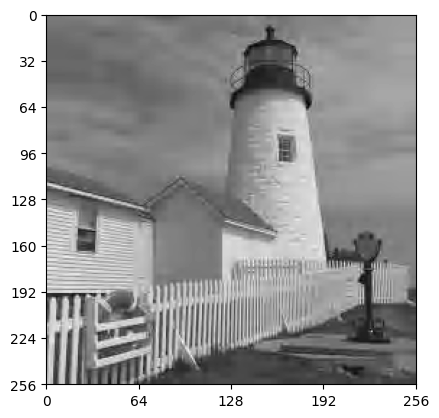

In [ ]:
N = 4
M = 16
fdq = False

step = 50

vlc, hufftab, totalbits = jpegenc_lbt3(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt3(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [ ]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

9.659922018737689 0.8187112375326363 0.4144852109867585


In [ ]:
# from cued_sf2_lab.jpeg_lbt_2_arith import jpegenc_lbt2_arith, jpegdec_lbt2_arith, objective_function_lbt2

In [ ]:
# N=4
# M=16
# fdq=True

# step = minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M), method='bounded').x

# encoded_bits, totalbits = jpegenc_lbt2_arith(image, step, fdq, N, M)
# print(totalbits)
# Z = jpegdec_lbt2_arith(encoded_bits, step, fdq, N, M)
# fig, ax = plt.subplots()
# plot_image(Z, ax=ax);

In [53]:
from cued_sf2_lab.jpeg_lbt_dwt import jpegenc_lbt_dwt, jpegdec_lbt_dwt, objective_function_lbt2

Forward 4 x 4 LBT
Second 2-level DWT on low-pass image
Performing frequency dependent quantization with overall step size of 18.56496367483949
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39534
Bits for huffman table = 1424
40958
Generating huffcode and ehuf using custom tables
Decoding rows
Regrouping quantized image
De-quantizing frequency dependent with overall step size of 18.56496367483949
Inverting second 2-level DWT on low-pass image
Inverting 4 x 4 LBT


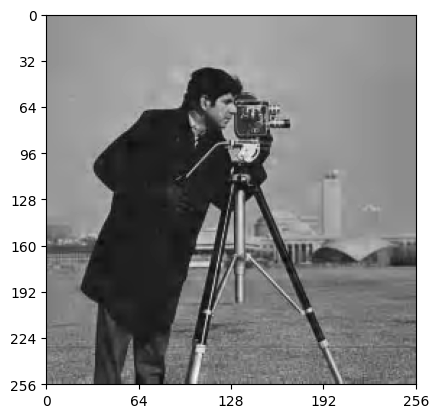

In [54]:
N = 4
M = 16
fdq = True

step = (minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt_dwt(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt_dwt(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [55]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

7.818461493568816 0.8232516832990615 0.422517905713681
